In [29]:
%reload_ext blackcellmagic
import pandas as pd
import numpy as np
import os
import pprint as pp
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100

In [30]:
# this function will return a dataframe where only the specified variable will be available
# the datasets are set up where all countries are displayed with one variable then another dataframe with a different variable was concatenated below it


def get_var(df, var):
    if "VAR" in df.columns:
        return df[df["VAR"] == var].fillna(value=0)
    elif 'ï»¿"MSTI_VAR"' in df.columns:
        return df[df['ï»¿"MSTI_VAR"'] == var].fillna(value=0)


## this funtion returns a dataframe where the countries are the index and the years are the columns and values are allocated appropiately


def get_values(df):
    countries = list(df.Country.unique())
    data = {}
    if "Time" in df.columns:
        years = list(df.Time.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Time"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    elif "Year" in list(df.columns):
        years = list(df.Year.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Year"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    return pd.DataFrame(data)

In [31]:
##this first database has information regarding broadband subscripstion
# i used fixed/mobile subscriptions for units: total and p100 people.
# this can be seen in the code_dict below
path = os.path.join("OECD_data", "broadband.csv")

with open(path) as csv_file:
    og_broadband_df = pd.read_csv(csv_file)

##I made a code_dict for every file because it got really hectic to try and decipher which code was which.
# I dont really use this in the code just makes it easier to understand whats going on
code_dicct = {
    "BB-P100-TOT": "Total fixed broadband suscriptions per 100 inhabitants",
    "BBW-P100-TOT": "Total mobile broadband subscriptions per 100 inhabitants",
    "BB-SUBS-TOT": "Total fixed broadband suscriptions",
    "BBW-SUBS-TOT": "Total mobile broadband subscriptions ",
}
og_bb_df = og_broadband_df[["Country", "VAR", "Time", "Value", "Unit"]]

In [32]:
##endpoint dataframes are created by calling the two functions introduced at the beggining

fixed100_bb_df = get_var(og_bb_df, "BB-P100-TOT")
mob100_bb_df = get_var(og_bb_df, "BBW-P100-TOT")
fixed100_df = get_values(fixed100_bb_df[fixed100_bb_df["Time"].str.startswith("2")])
mobile100_df = get_values(mob100_bb_df[mob100_bb_df["Time"].str.startswith("2")])

fixed_bb_df = get_var(og_bb_df, "BB-SUBS-TOT")
mob_bb_df = get_var(og_bb_df, "BBW-SUBS-TOT")
fixed_df = get_values(fixed_bb_df[fixed_bb_df["Time"].str.startswith("2")])
mobile_df = get_values(mob_bb_df[mob_bb_df["Time"].str.startswith("2")])



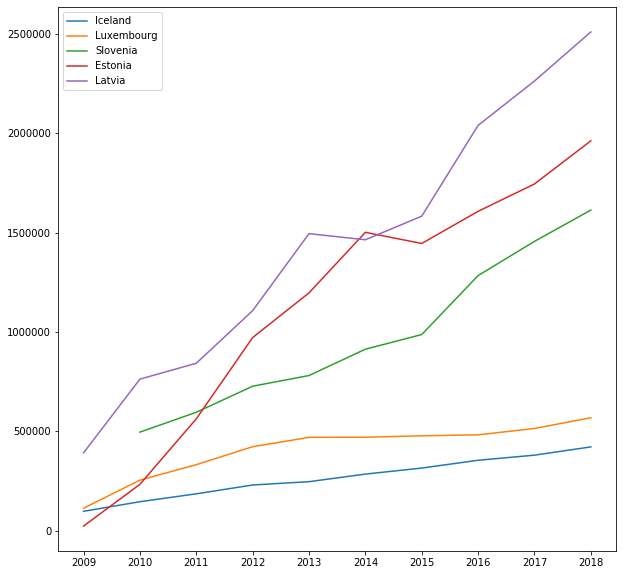

In [33]:
plt.figure(figsize=(10, 10))
i_c = 0
for i in list(mobile_df.sort_values("2018", ascending=True).head().index):
    lab = list(mobile_df.sort_values("2018", ascending=True).head().index)
    # if i in list(fixed_df.index):

    # plt.plot(mobile_df.columns, mobile_df.loc[i])
    plt.plot(
        mobile_df.columns,
        mobile_df.sort_values("2018", ascending=True).head().loc[i],
        label = lab[i_c]
    )
    plt.legend()
    i_c += 1
plt.show()

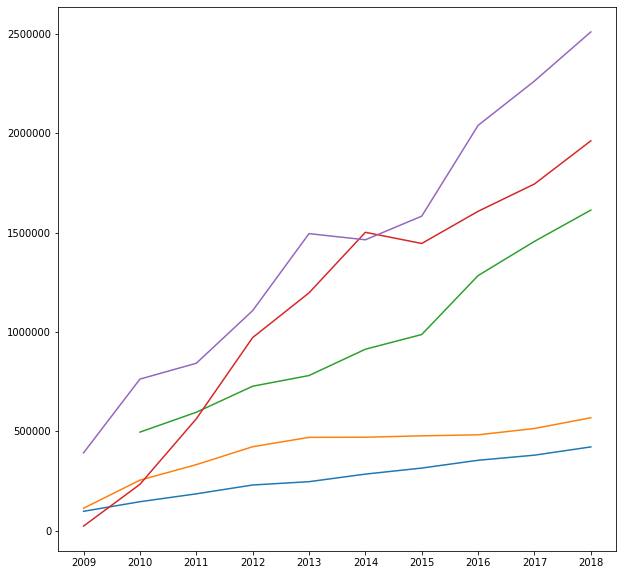

In [34]:
plt.figure(figsize=(10, 10))
for i in list(mobile_df.sort_values("2018").head().index):

    plt.plot(mobile_df.columns, mobile_df.sort_values("2018").head().loc[i])

plt.show()

In [35]:
path = os.path.join("OECD_data", "mean2median_wealth.csv")

with open(path) as csv_file:
    wealth_dist = pd.read_csv(csv_file)

wealth_dist = wealth_dist[["Country", "VAR", "Variable", "Time", "Value"]]

In [36]:
path = os.path.join("OECD_data", "GERD.csv")

with open(path) as csv_file:
    GERD = pd.read_csv(csv_file)

GERD = GERD[["Country", 'ï»¿"MSTI_VAR"', "MSTI Variables", "Year", "Value"]]

code_dict = {
    "G_XGDP": "GERD as a percentage of GDP",
    "TP_TT": "Total R&D personnel (FTE)",
    "TP_TTGRO": "Total R&D personnel, compound annual growth rate",
    "TH_RS": "Total researchers (headcount)",
    "TH_WRS": "Woman researchers (headcount)",
    "H_XGDP": "HERD as a percentage of GDP",
    "GDP_PPP": "Gross Domestic Product (current PPP$)",
    "VA_PPP": "Value Added of Industry (current PPP$)",
}

In [37]:
path = os.path.join("OECD_data", "economic_outlook.csv")

with open(path) as csv_file:
    econ_df = pd.read_csv(csv_file)

econ_df = econ_df[["Country", "VARIABLE", "Variable", "Time", "Value"]]

code_dict = {
    "UN": "Unemployment, level",
    "UNR": "Unemployment rate",
    "GAPUNR": "Unemployment gap",
    "POP": "Total population",
    "TYB": "Direct taxes on business",
    "CPI_YTYPCT": "Headline inflation",
    "LF": "Labour force",
}

In [38]:
###Wealth_distribution
mean2median = get_var(wealth_dist, "M2MR")
# units = ???
m2m_df = get_values(mean2median)

mean_wealth = get_var(wealth_dist, "MNWI")
##units = ???
mwealth_df = get_values(mean_wealth)

##Research and Development
gdpRD = get_var(GERD, "G_XGDP")
gdpRD_df = get_values(gdpRD)

In [39]:
TP_TT = get_var(GERD, "TP_TT")
FTE = get_values(TP_TT)

TP_TTGRO = get_var(GERD, "TP_TTGRO")
FTE_growth = get_values(TP_TTGRO)

TH_RS = get_var(GERD, "TH_RS")
res_person = get_values(TH_RS)

TH_WR = get_var(GERD, "TH_WR")
res_wom = get_values(TH_WR)

H_XGDP = get_var(GERD, "H_XGDP")
herd = get_values(H_XGDP)

GDP_PPP = get_var(GERD, "GDP_PPP")
gdp = get_values(GDP_PPP)

VA_PPP = get_var(GERD, "VA_PPP")
val_addedPPP = get_values(VA_PPP)

In [131]:
colors = [
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
]


In [122]:
dataframes = [fixed100_df, mobile100_df, gdp, gdpRD_df, val_addedPPP, FTE, FTE_growth, res_person, res_wom, herd,  m2m_df, mwealth_df]
titles = ['fixed100', 'mobile100', 'gdp', 'gdpRD', 'val_addedPPP', 'FTE', 'FTE_growth', 'res_person', 'res_wom', 'herd',  'm2m', 'mwealth']

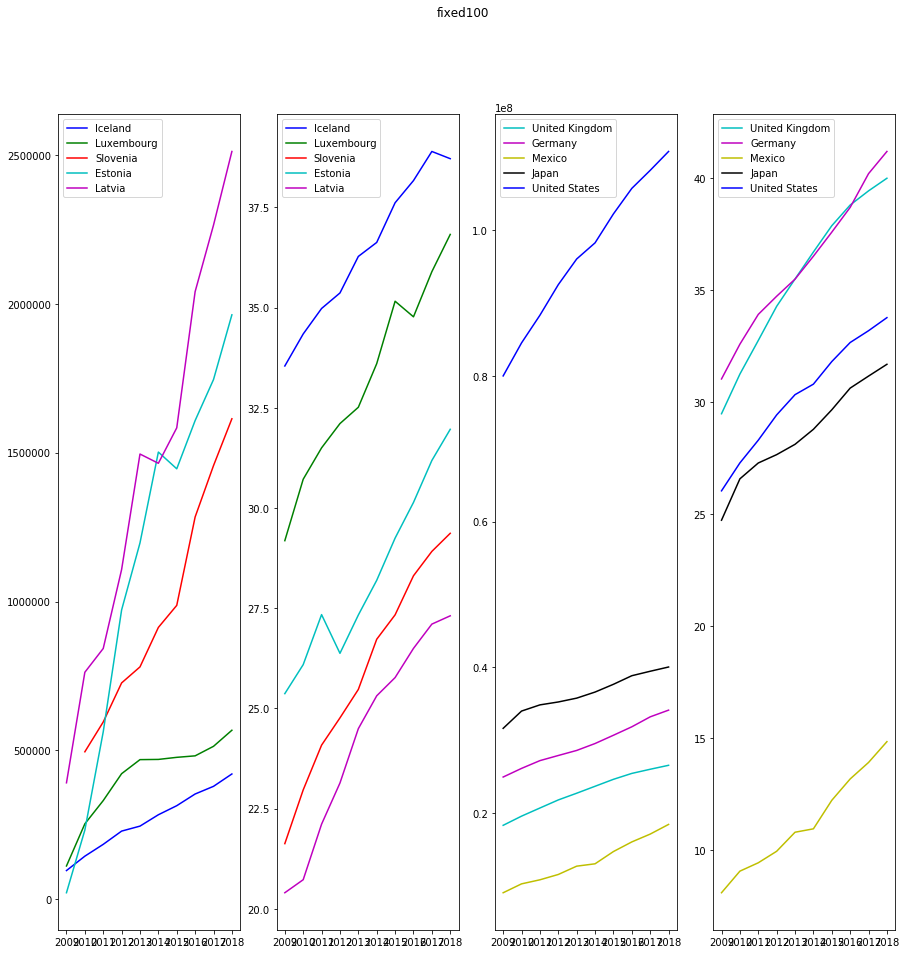

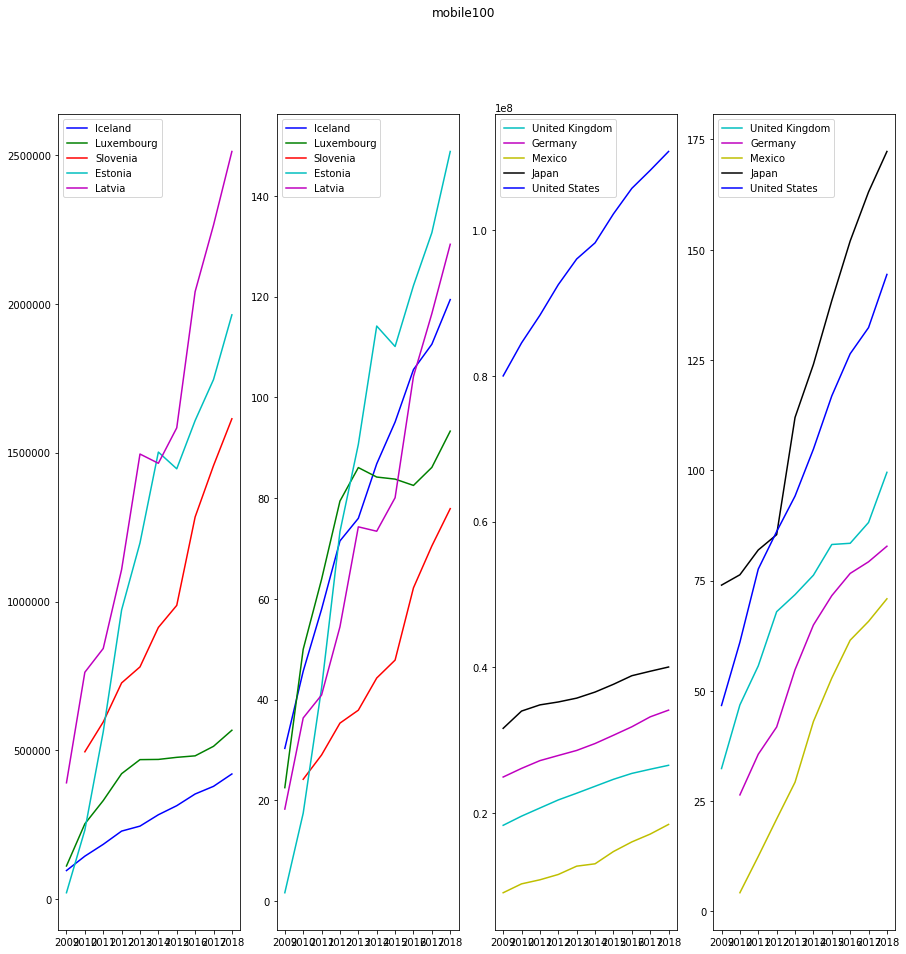

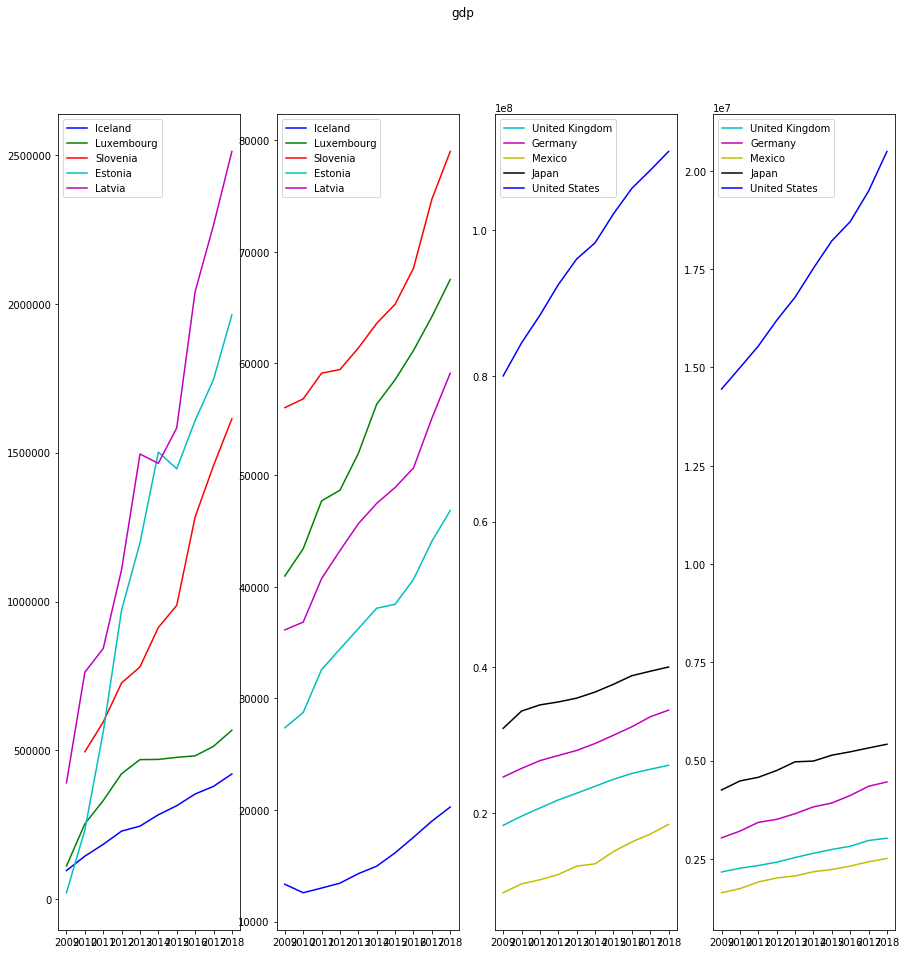

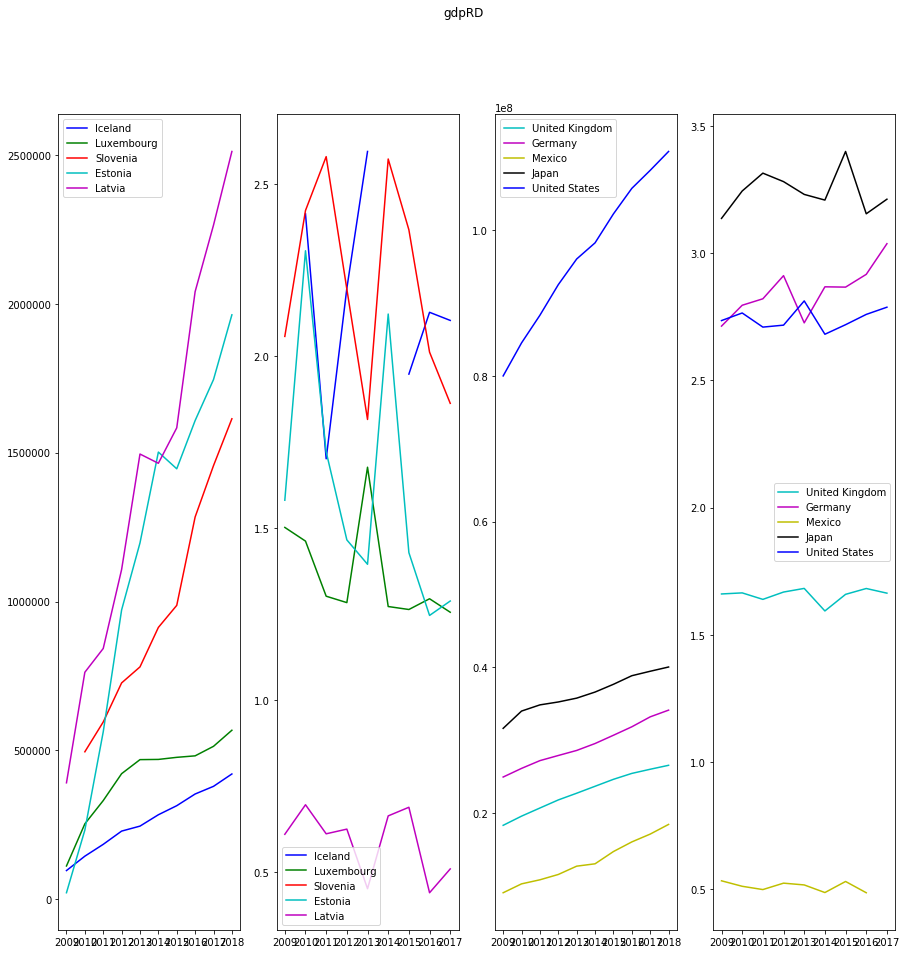

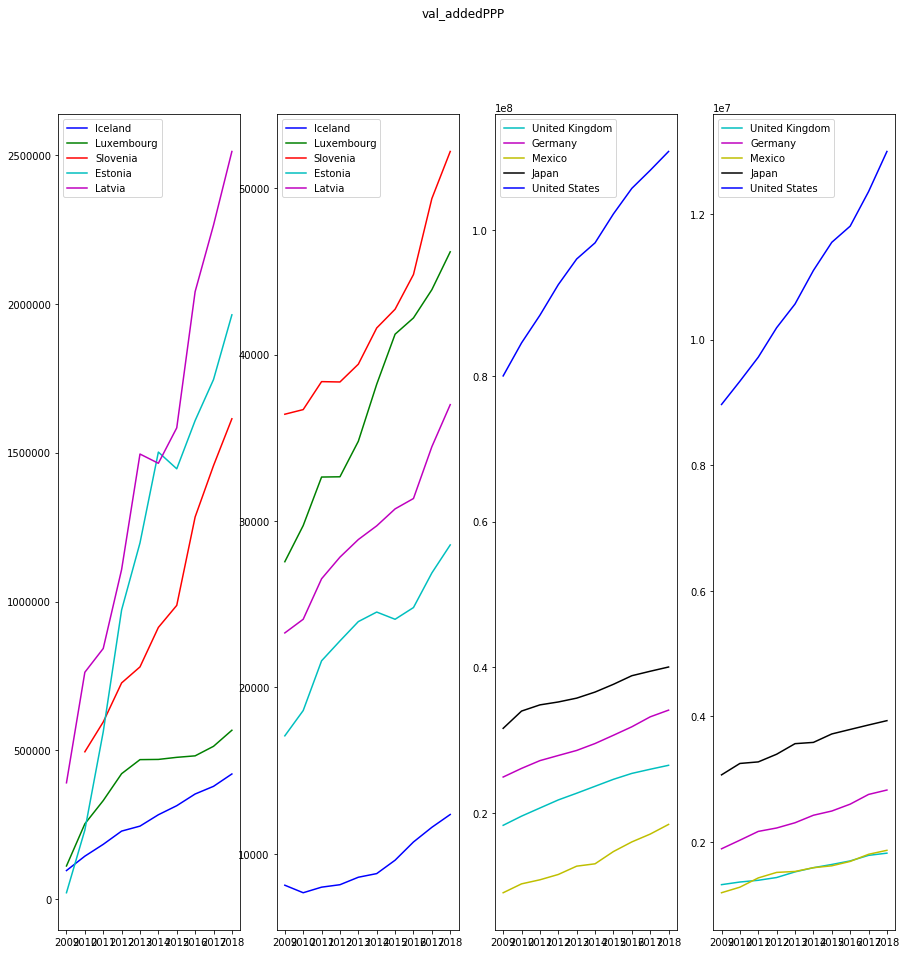

KeyError: 'United States'

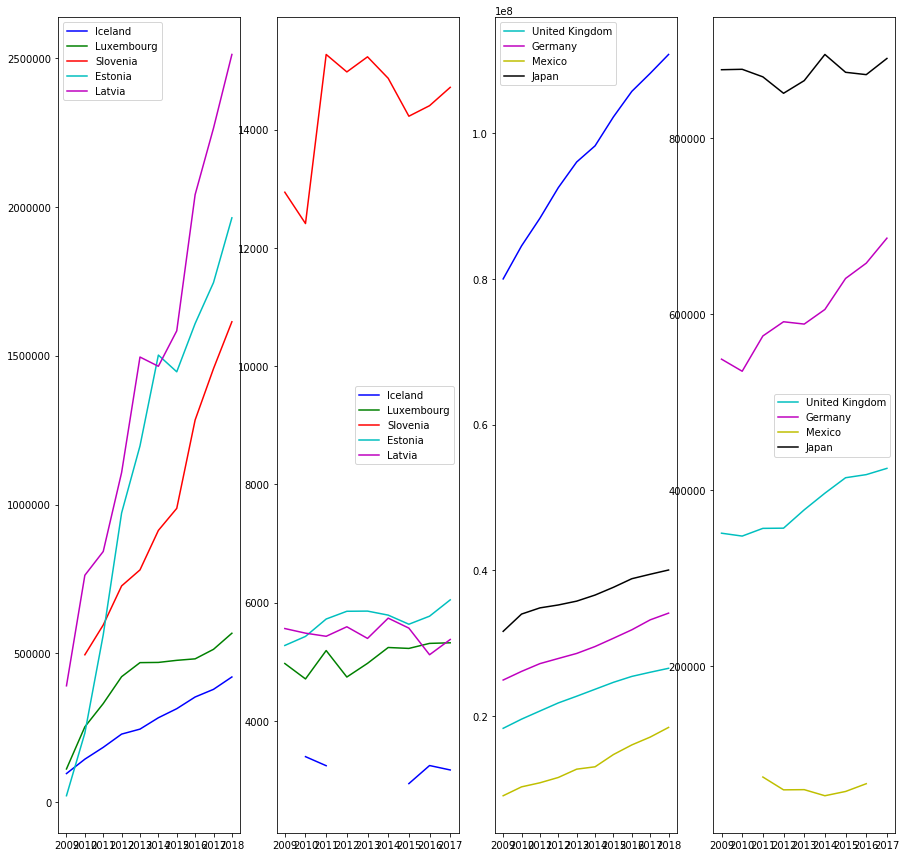

In [130]:
ind = 0
for df in dataframes:
    cc = 0
    fig, axs = plt.subplots(1, 4, figsize=(15, 15))
    
    head = mobile_df.sort_values("2018", ascending=True).head()
    lab_head = list(mobile_df.sort_values("2018", ascending=True).head().index)
    #dfhead =  mobile_df.sort_values("2018", ascending=True).head() ##sorts by 2018 and some years dont have  it how do we get around this??
    
    tail = mobile_df.sort_values("2018", ascending=True).tail()
    lab_tail = list(mobile_df.sort_values("2018", ascending=True).tail().index)
    #dftail =  mobile_df.sort_values("2018", ascending=True).tail()
    
#     for i in list(sorted(head.index)) or i in list(sorted(tail.index)):
#         labels = list(sorted(head.index))
# #         try:
    for c in list(head.index):
        idk = axs[0].plot(sorted(mobile_df.columns), mobile_df.loc[c], color=colors[cc], label=c)
        idk3 = axs[1].plot(sorted(df.columns), df.loc[c], color=colors[cc], label=c)
        axs[0].legend()
        axs[1].legend()
        cc += 1

    for c in list(tail.index):
        idk2 = axs[2].plot(sorted(fixed_df.columns), fixed_df.loc[c], color=colors[cc + 5], label=c)
        idk4 = axs[3].plot(sorted(df.columns), df.loc[c], color=colors[cc + 5], label=c)

        axs[2].legend()
        axs[3].legend()
            
#         except:
#             pass
        cc += 1
    plt.suptitle(titles[ind])
    ind += 1
    
    plt.show()

    
##mobile subscriptions rise at a faster rate that fixed subscriptions  
##### visualized better in per100 units

head

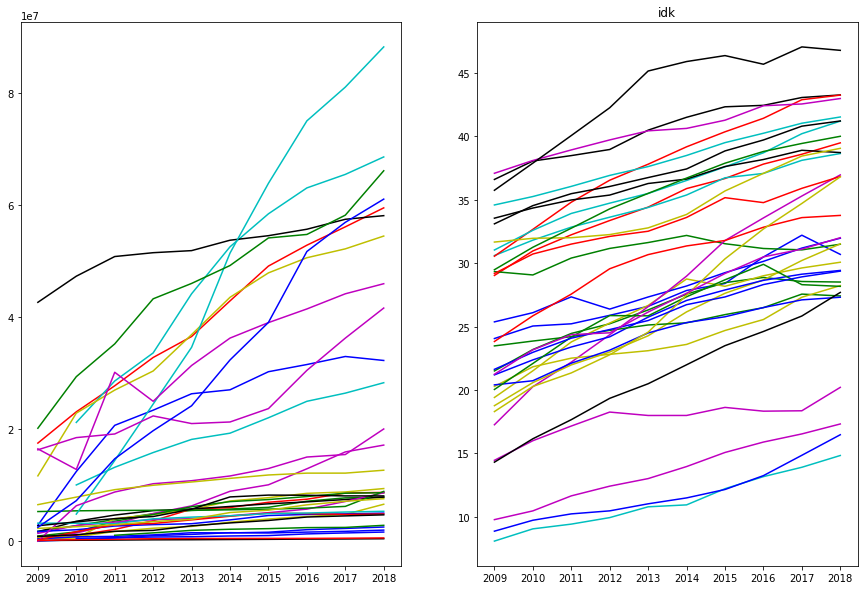

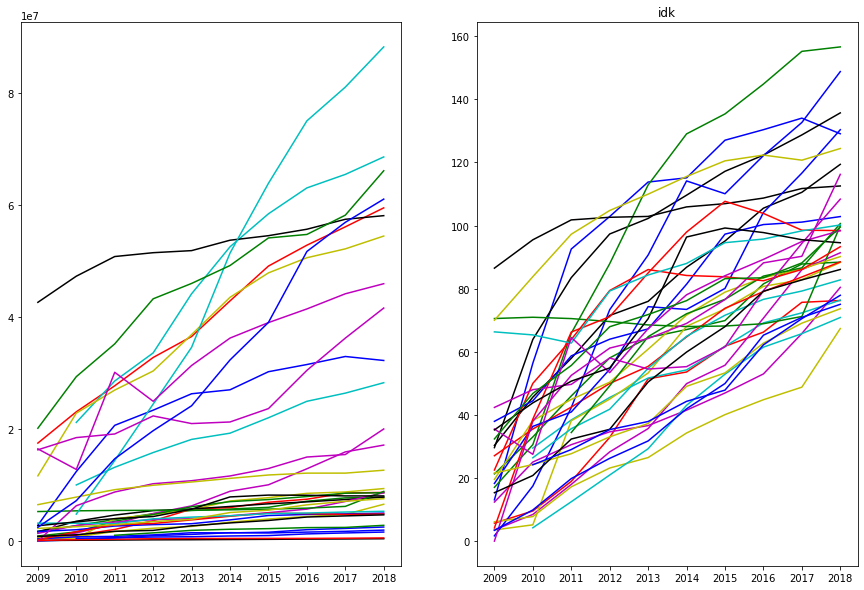

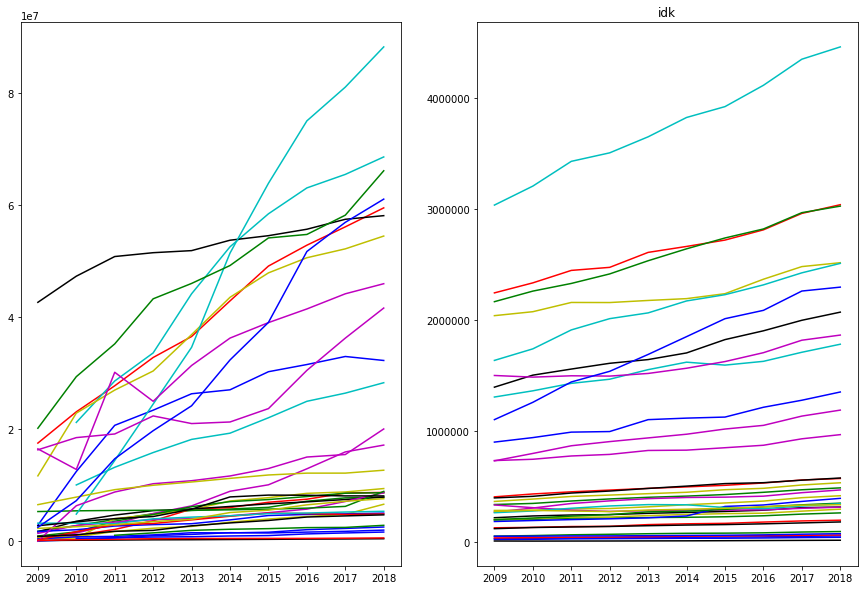

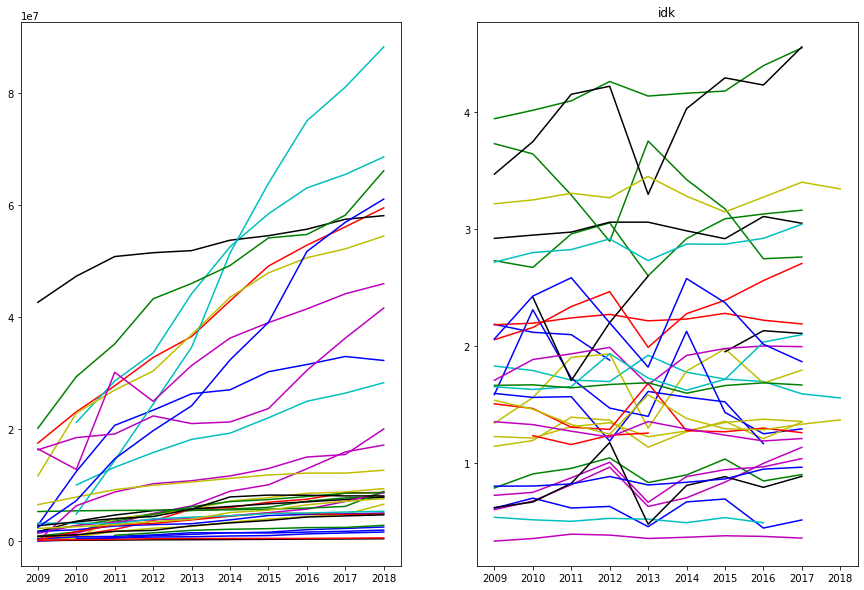

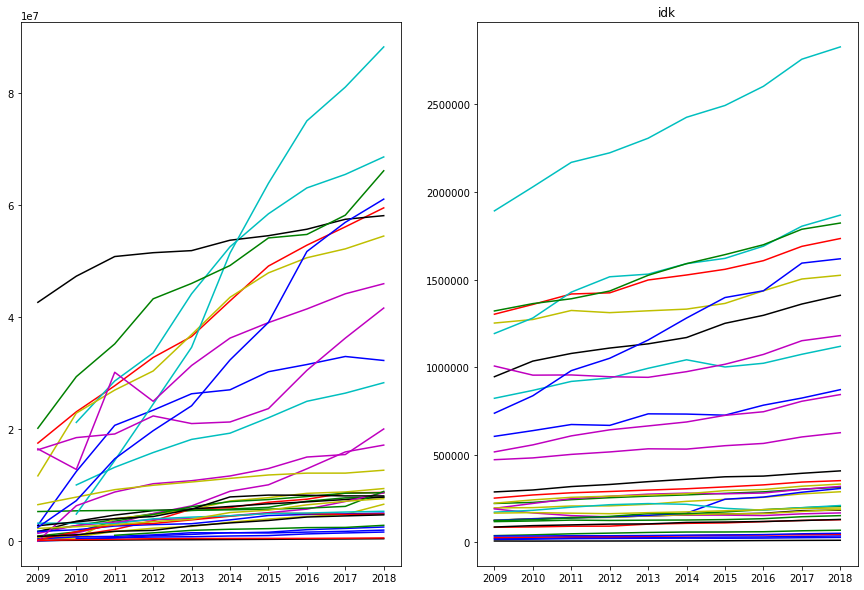

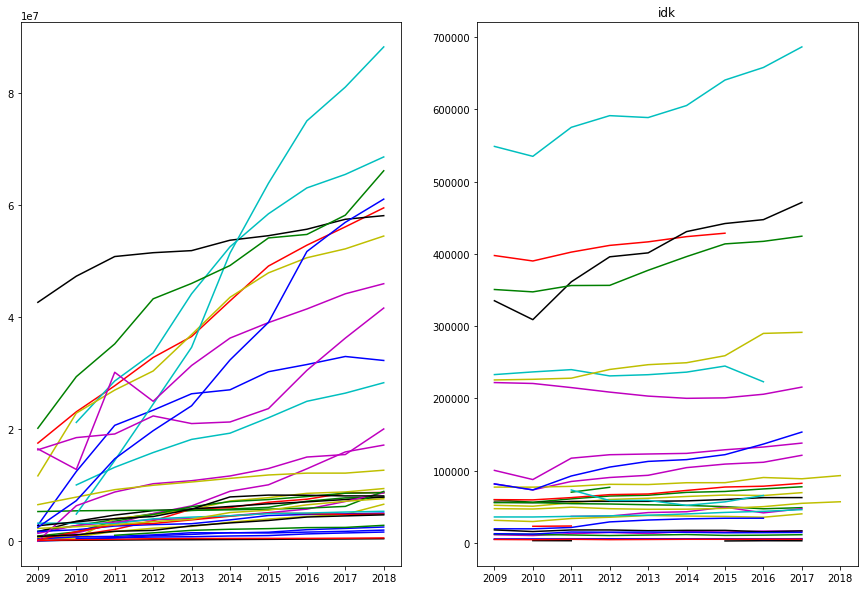

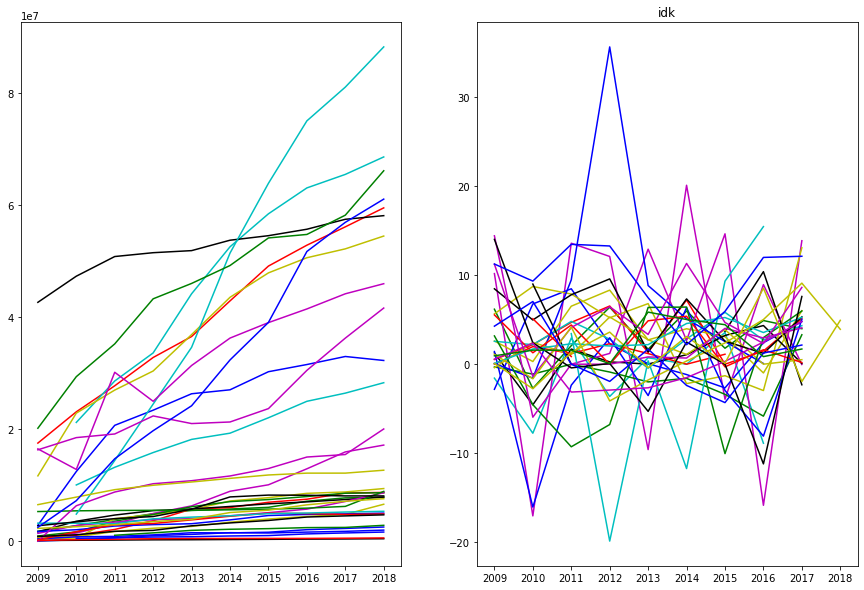

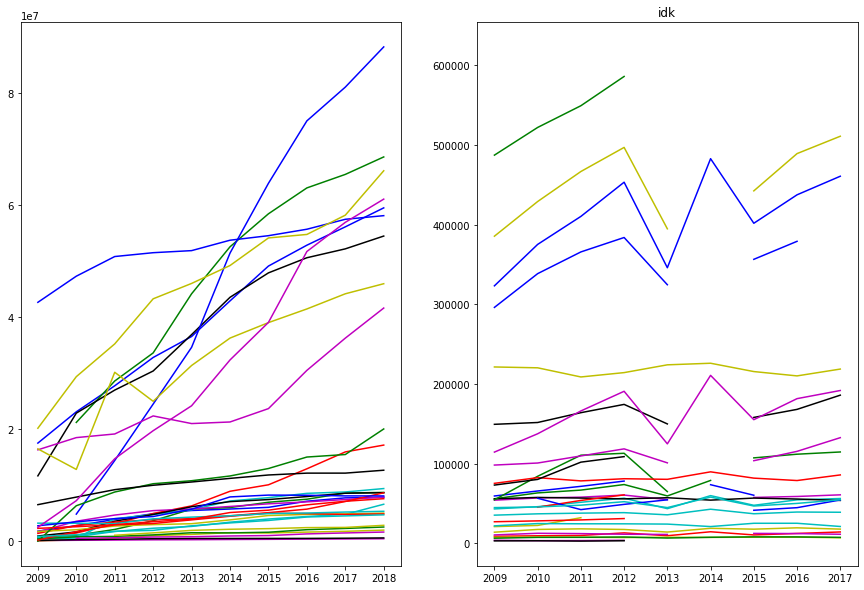

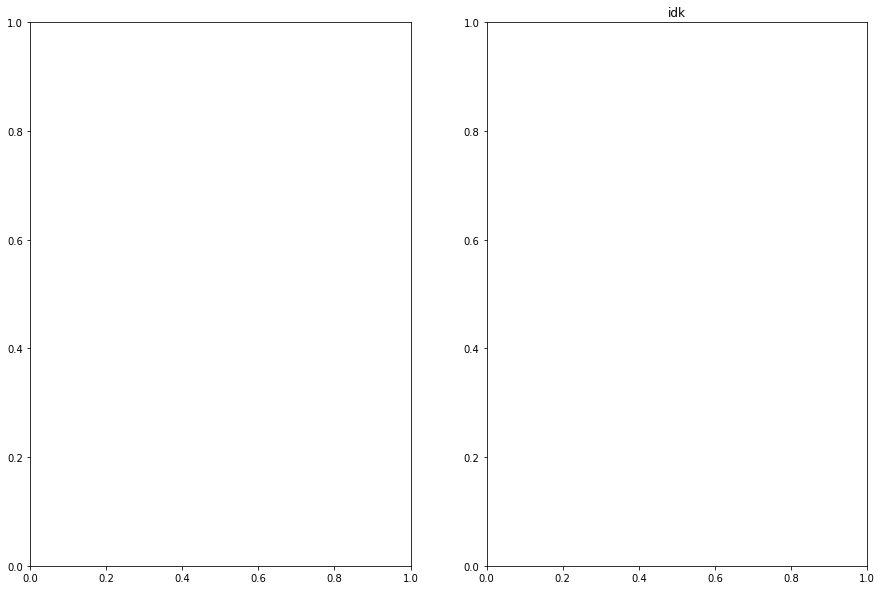

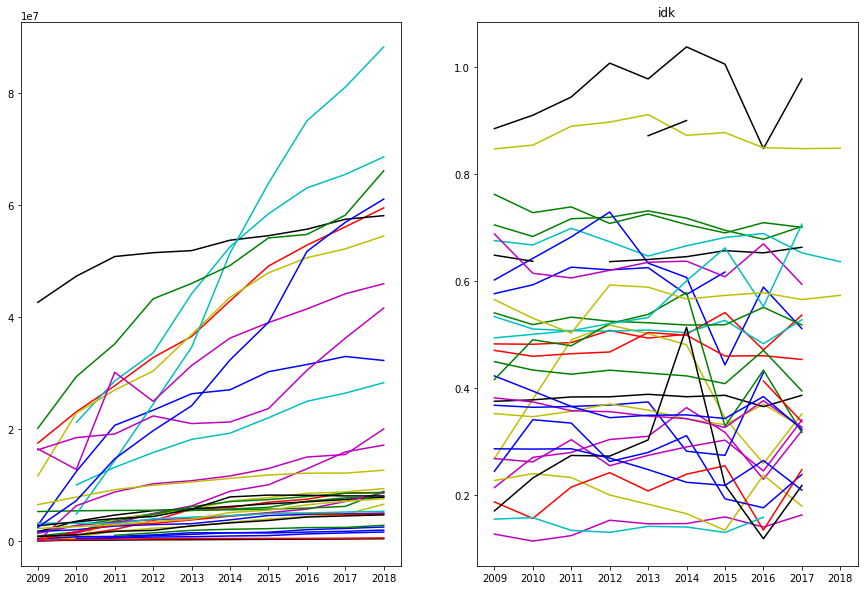

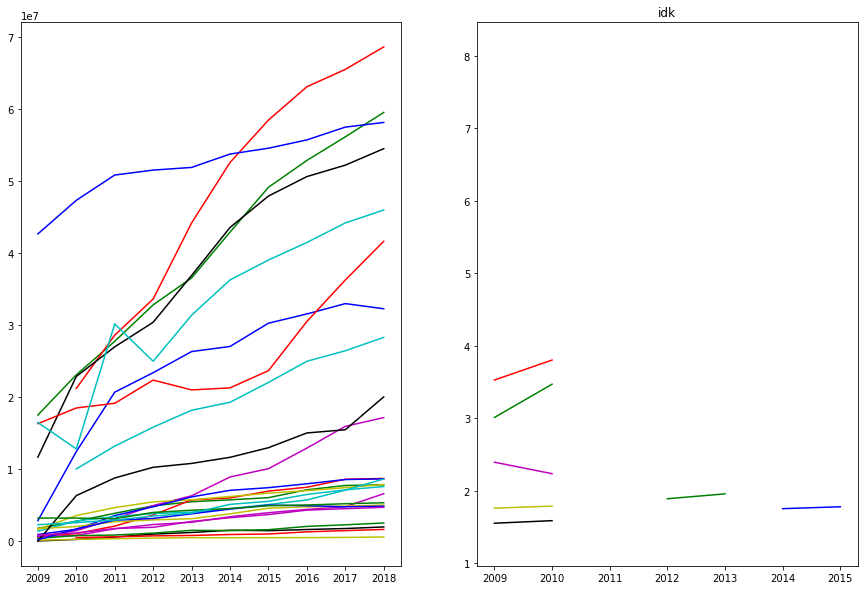

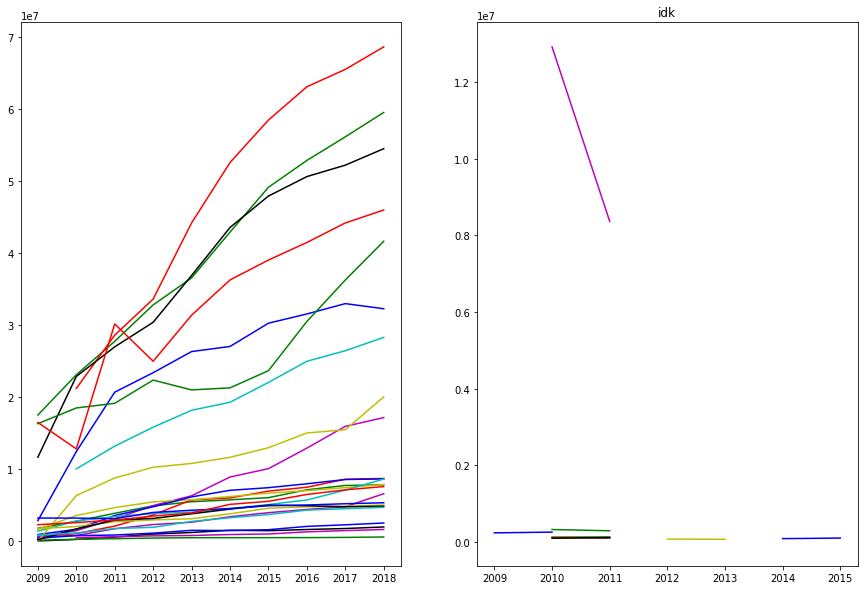

In [105]:
##no united states cihna or japan
#maybe we can analyze these three countries by themselves
for df in dataframes:
    c = 0
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    plt.title('idk')
    for i in list(sorted(df.index)):
        
        if i == 'United States' or i == 'China' or i =='Japan':
            pass

        elif i in list(sorted(mobile_df.index)):

            idk = axs[0].plot(
                sorted(mobile_df.columns), mobile_df.loc[i], color=colors[c]
            )
            idk2 = axs[1].plot(sorted(df.columns), df.loc[i], color=colors[c])
            c += 1

    # rint(i)
    plt.show()

In [429]:
##economic_indicators
UN = get_var(econ_df, "UN")
unemployment_level = get_values(TH_RS)

UNR = get_var(econ_df, "UNR")
unemployment_rate = get_values(UNR)

GAPUNR = get_var(econ_df, "GAPUNR")
unemployment_gap = get_values(GAPUNR)

POP = get_var(econ_df, "POP")
population = get_values(POP)

TYB = get_var(econ_df, "TYB")
taxes_on_business = get_values(TYB)

CPI_YTYPCT = get_var(econ_df, "CPI_YTYPCT")
headline_inflation = get_values(CPI_YTYPCT)

LF = get_var(econ_df, "LF")
labour_force = get_values(LF)

In [ ]:
## to find desired code_dict

# what = zip(list(econ_df['VARIABLE']), list(econ_df['Variable']))
# uni = {}
# for i in what:
#     if i not in uni:
#         uni[i[0]] = i[1]
#     else:
#         pass
# uni

In [ ]:
## merge dataframes and experiment mergin by year in wealth distribution

In [ ]:
## make a percentage column where fixed + mobile / total pop is a value
### %connected to mobile